<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/CodeChallenge_Manipulate_regression_slopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraies
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats('svg')

In [25]:
def builds_n_train(x, y, numepochs=500, learningRate=0.05):
  ANNReg = nn.Sequential(
      nn.Linear(1, 1),
      nn.ReLU(),
      nn.Linear(1, 1),
  )

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descend to implement)
  optimizer = torch.optim.SGD(ANNReg.parameters(), lr=learningRate)

  for epochi in range(numepochs):

    # forward pass
    yHat = ANNReg(x)

    # compute loss
    loss = lossfun(yHat, y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  final_prediction = ANNReg(x)

  # final loss
  final_loss = (final_prediction - y).pow(2).mean()
  
  return final_loss

In [22]:
def create_data(m, N=50):
  x = torch.randn(N, 1) / 2
  y = m * x + torch.randn(N, 1) / 2

  # # and plot
  # plt.plot(x, y, 's')
  # plt.show()
  return x, y


In [27]:
slops = np.linspace(-2, 2, 21)
slops

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

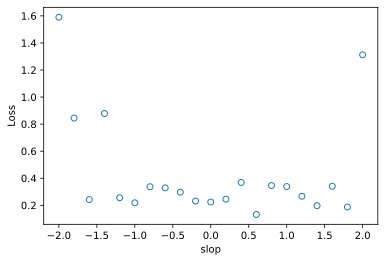

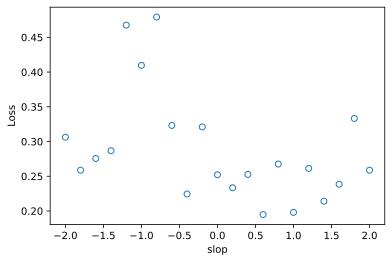

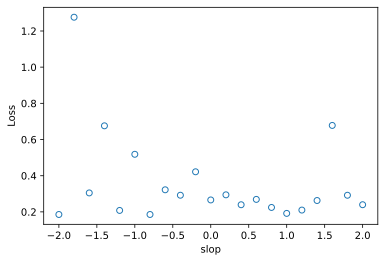

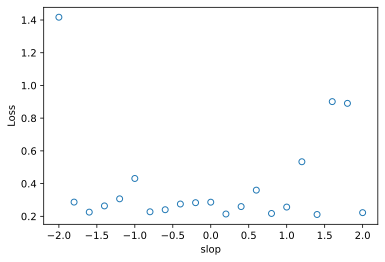

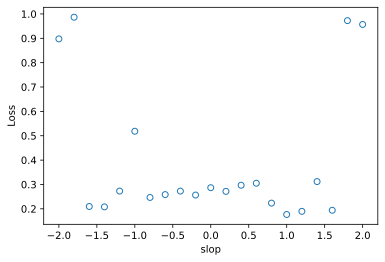

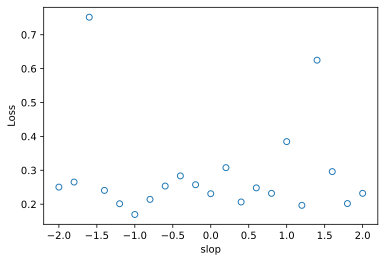

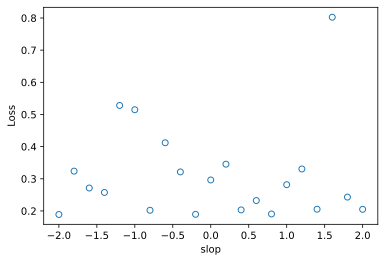

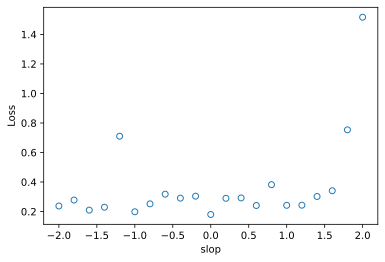

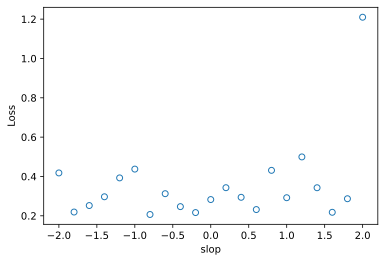

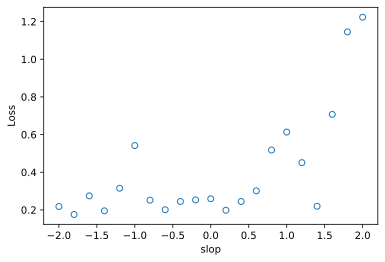

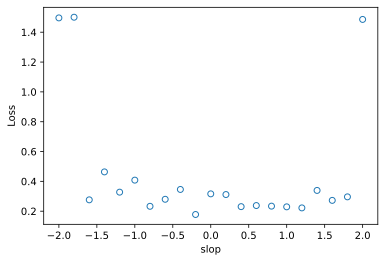

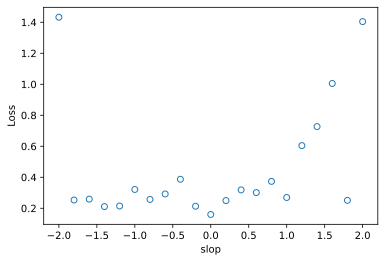

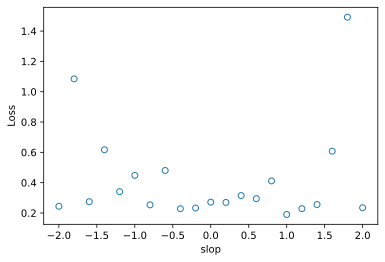

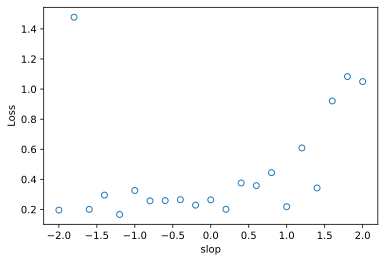

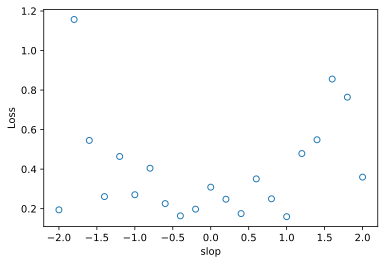

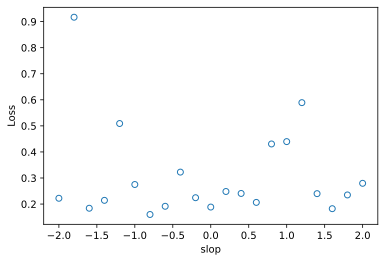

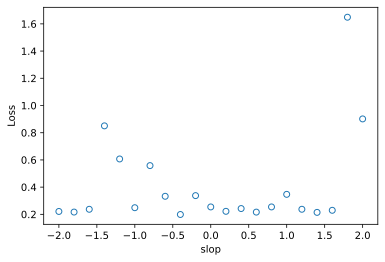

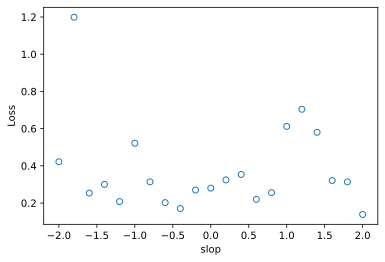

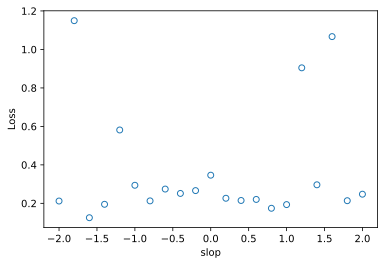

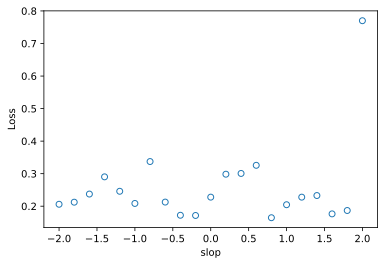

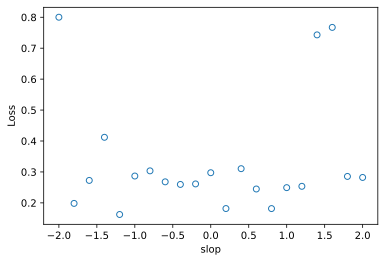

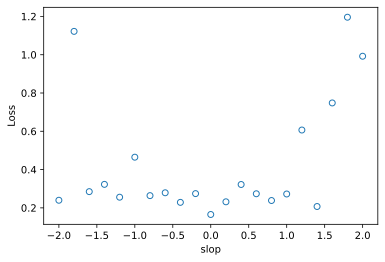

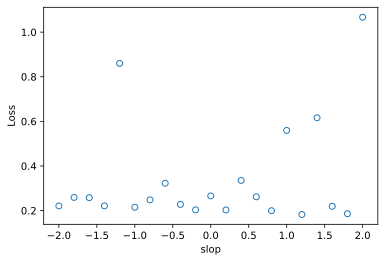

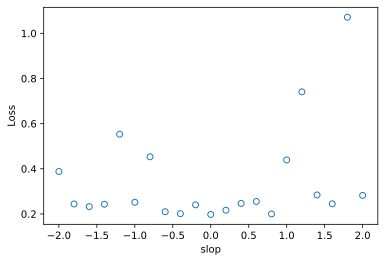

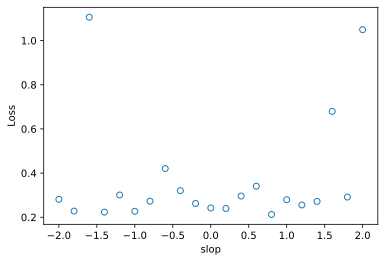

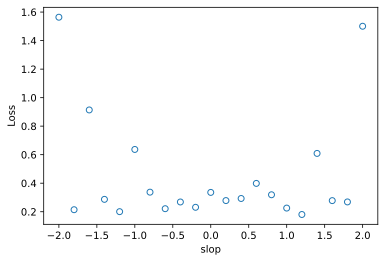

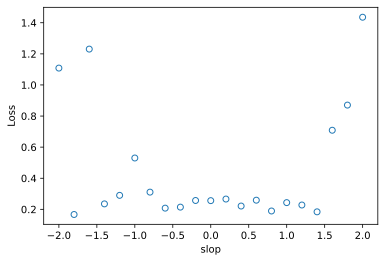

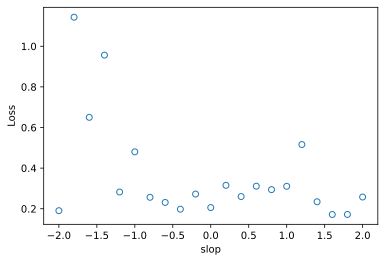

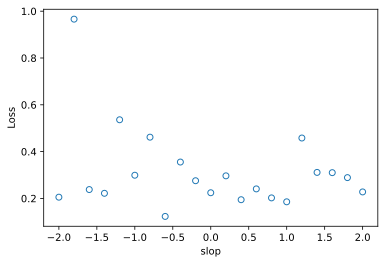

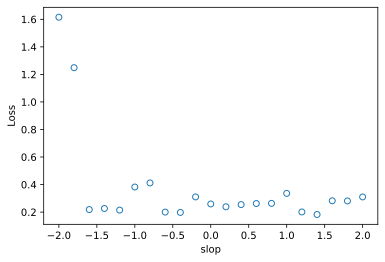

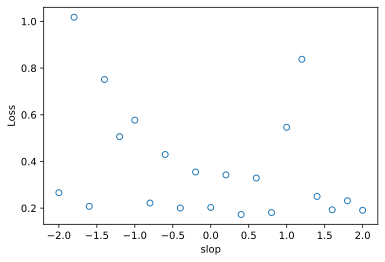

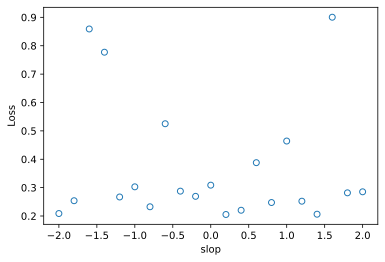

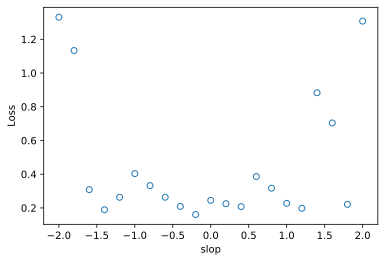

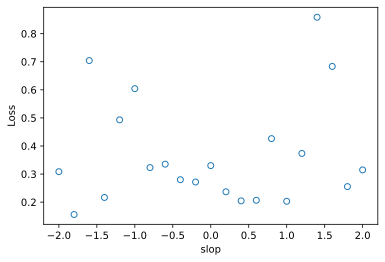

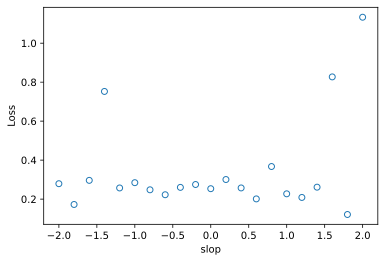

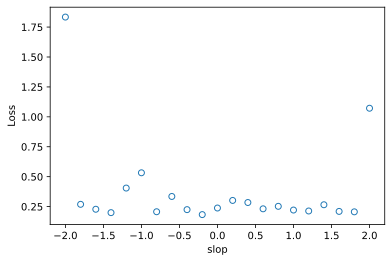

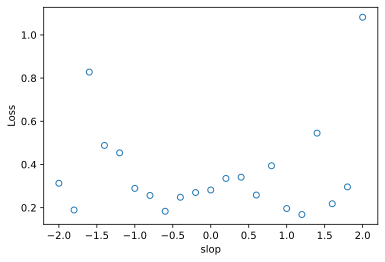

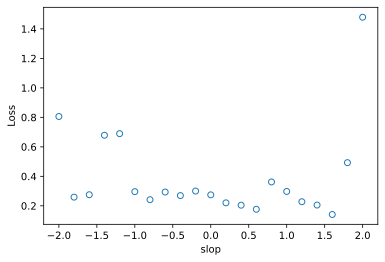

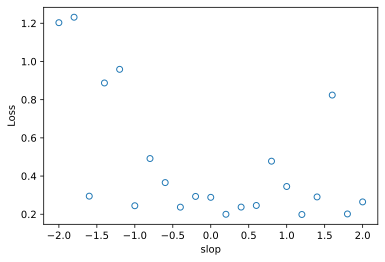

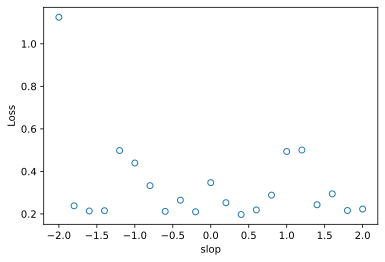

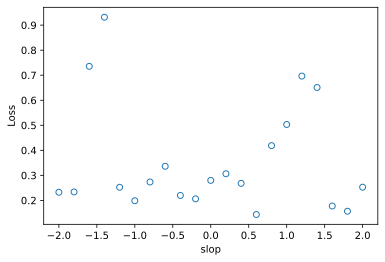

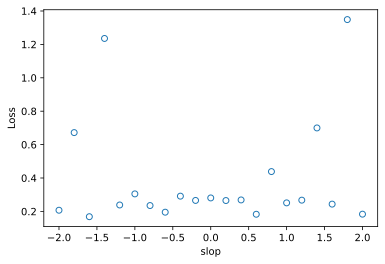

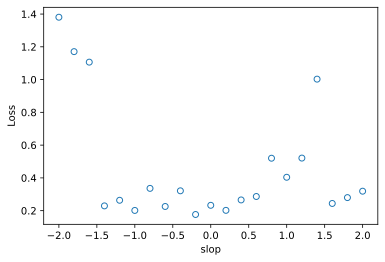

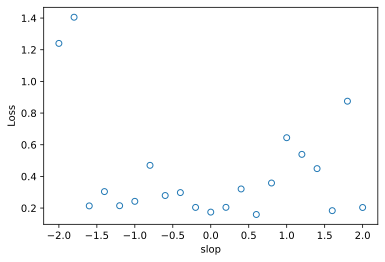

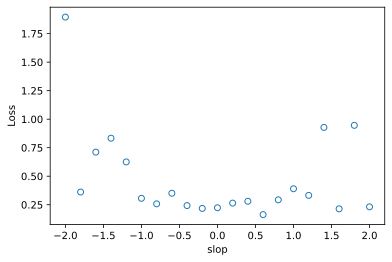

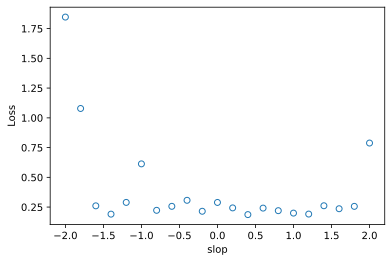

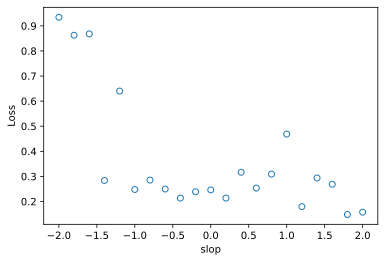

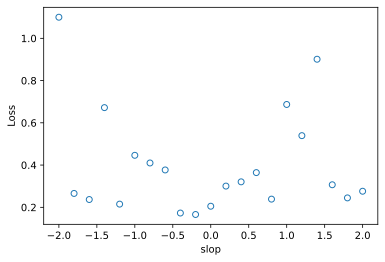

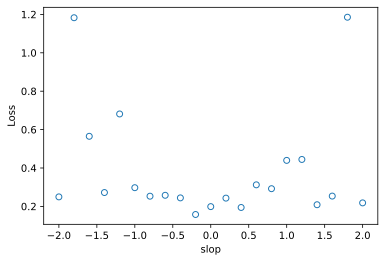

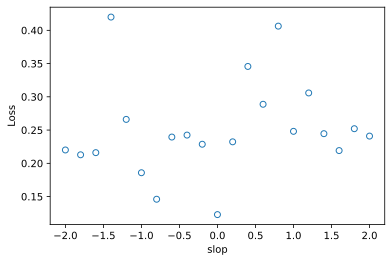

In [29]:
for _ in range(50):
  final_predictions = torch.zeros(len(slops))
  final_losses = torch.zeros(len(slops))

  for i, m in enumerate(slops):
    x, y = create_data(m)
    final_losses[i] = builds_n_train(x, y)

  plt.plot(slops, final_losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
  plt.xlabel('slop')
  plt.ylabel('Loss')
  plt.show()
    
